<a href="https://colab.research.google.com/github/lauratcc18/IAMINTIC/blob/main/classifier_001_Scikit_Learn_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pickle
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
movie_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQCvweMy42fm0kQuiTVKGXZ980k2K2SQ_s8C-NUn0L1ax_IdaDte1Og_9cI-byzmoOirYf1-oEDtxsy/pub?output=csv')
movie_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


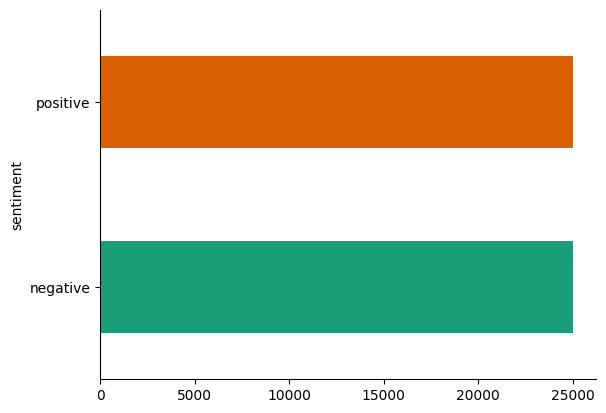

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
movie_data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["positive", "negative"])
X = movie_data['review'].tolist()
y = le.transform(movie_data['sentiment'].tolist())

In [ ]:
print(y[:4])
X[:4]


[1 1 1 0]


["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [ ]:
le.transform(["positive", "negative"])

array([1, 0])

In [ ]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

In [ ]:
documents[:1][:10]

['one of the other reviewer ha mentioned that after watching just 1 oz episode you ll be hooked they are right a this is exactly what happened with me br br the first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it is hardcore in the classic use of the word br br it is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda em city is home to many aryan muslim gangsta latino christian italian irish and more so scuffle death stare dodgy dealing and shady agreement are never far away br br would say the main appeal of the show is due to the fact that it go where other show wouldn dare forget pretty picture painted 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))# max_features=1000, min_df=5, max_df=0.7,
# vectorizer = CountVectorizer(ngram_range=(2, 2))
# X = vectorizer.fit_transform(documents[:1][:10]).toarray()
X = vectorizer.fit_transform(documents).toarray()

In [ ]:
print(len(vectorizer.get_feature_names_out()))
vectorizer.get_feature_names_out()[:100]

1000


array(['10', '15', '20', '30', '50', '70', '80', '90', 'ability', 'able',
       'absolutely', 'accent', 'across', 'act', 'acted', 'acting',
       'action', 'actor', 'actress', 'actual', 'actually', 'adaptation',
       'add', 'admit', 'adult', 'adventure', 'age', 'ago', 'agree', 'air',
       'alien', 'alive', 'almost', 'alone', 'along', 'already', 'also',
       'although', 'always', 'amazing', 'america', 'american', 'among',
       'amount', 'amusing', 'animal', 'animation', 'annoying', 'another',
       'answer', 'anti', 'anyone', 'anything', 'anyway', 'apart',
       'apparently', 'appear', 'appearance', 'appears', 'appreciate',
       'around', 'art', 'aside', 'ask', 'aspect', 'atmosphere', 'attack',
       'attempt', 'attention', 'audience', 'average', 'avoid', 'award',
       'away', 'awful', 'baby', 'back', 'background', 'bad', 'badly',
       'band', 'based', 'basic', 'basically', 'battle', 'beautiful',
       'beauty', 'became', 'become', 'becomes', 'begin', 'beginning',
  

In [ ]:
ind_interst = [429, 723, 401, 875]
for item in ind_interst:
  print(vectorizer.get_feature_names_out()[item])

horrible
ridiculous
ha
think


In [ ]:
print(len(vectorizer.get_feature_names_out()))

1000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
classifier = RandomForestClassifier(n_estimators=10, max_depth=5,  random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

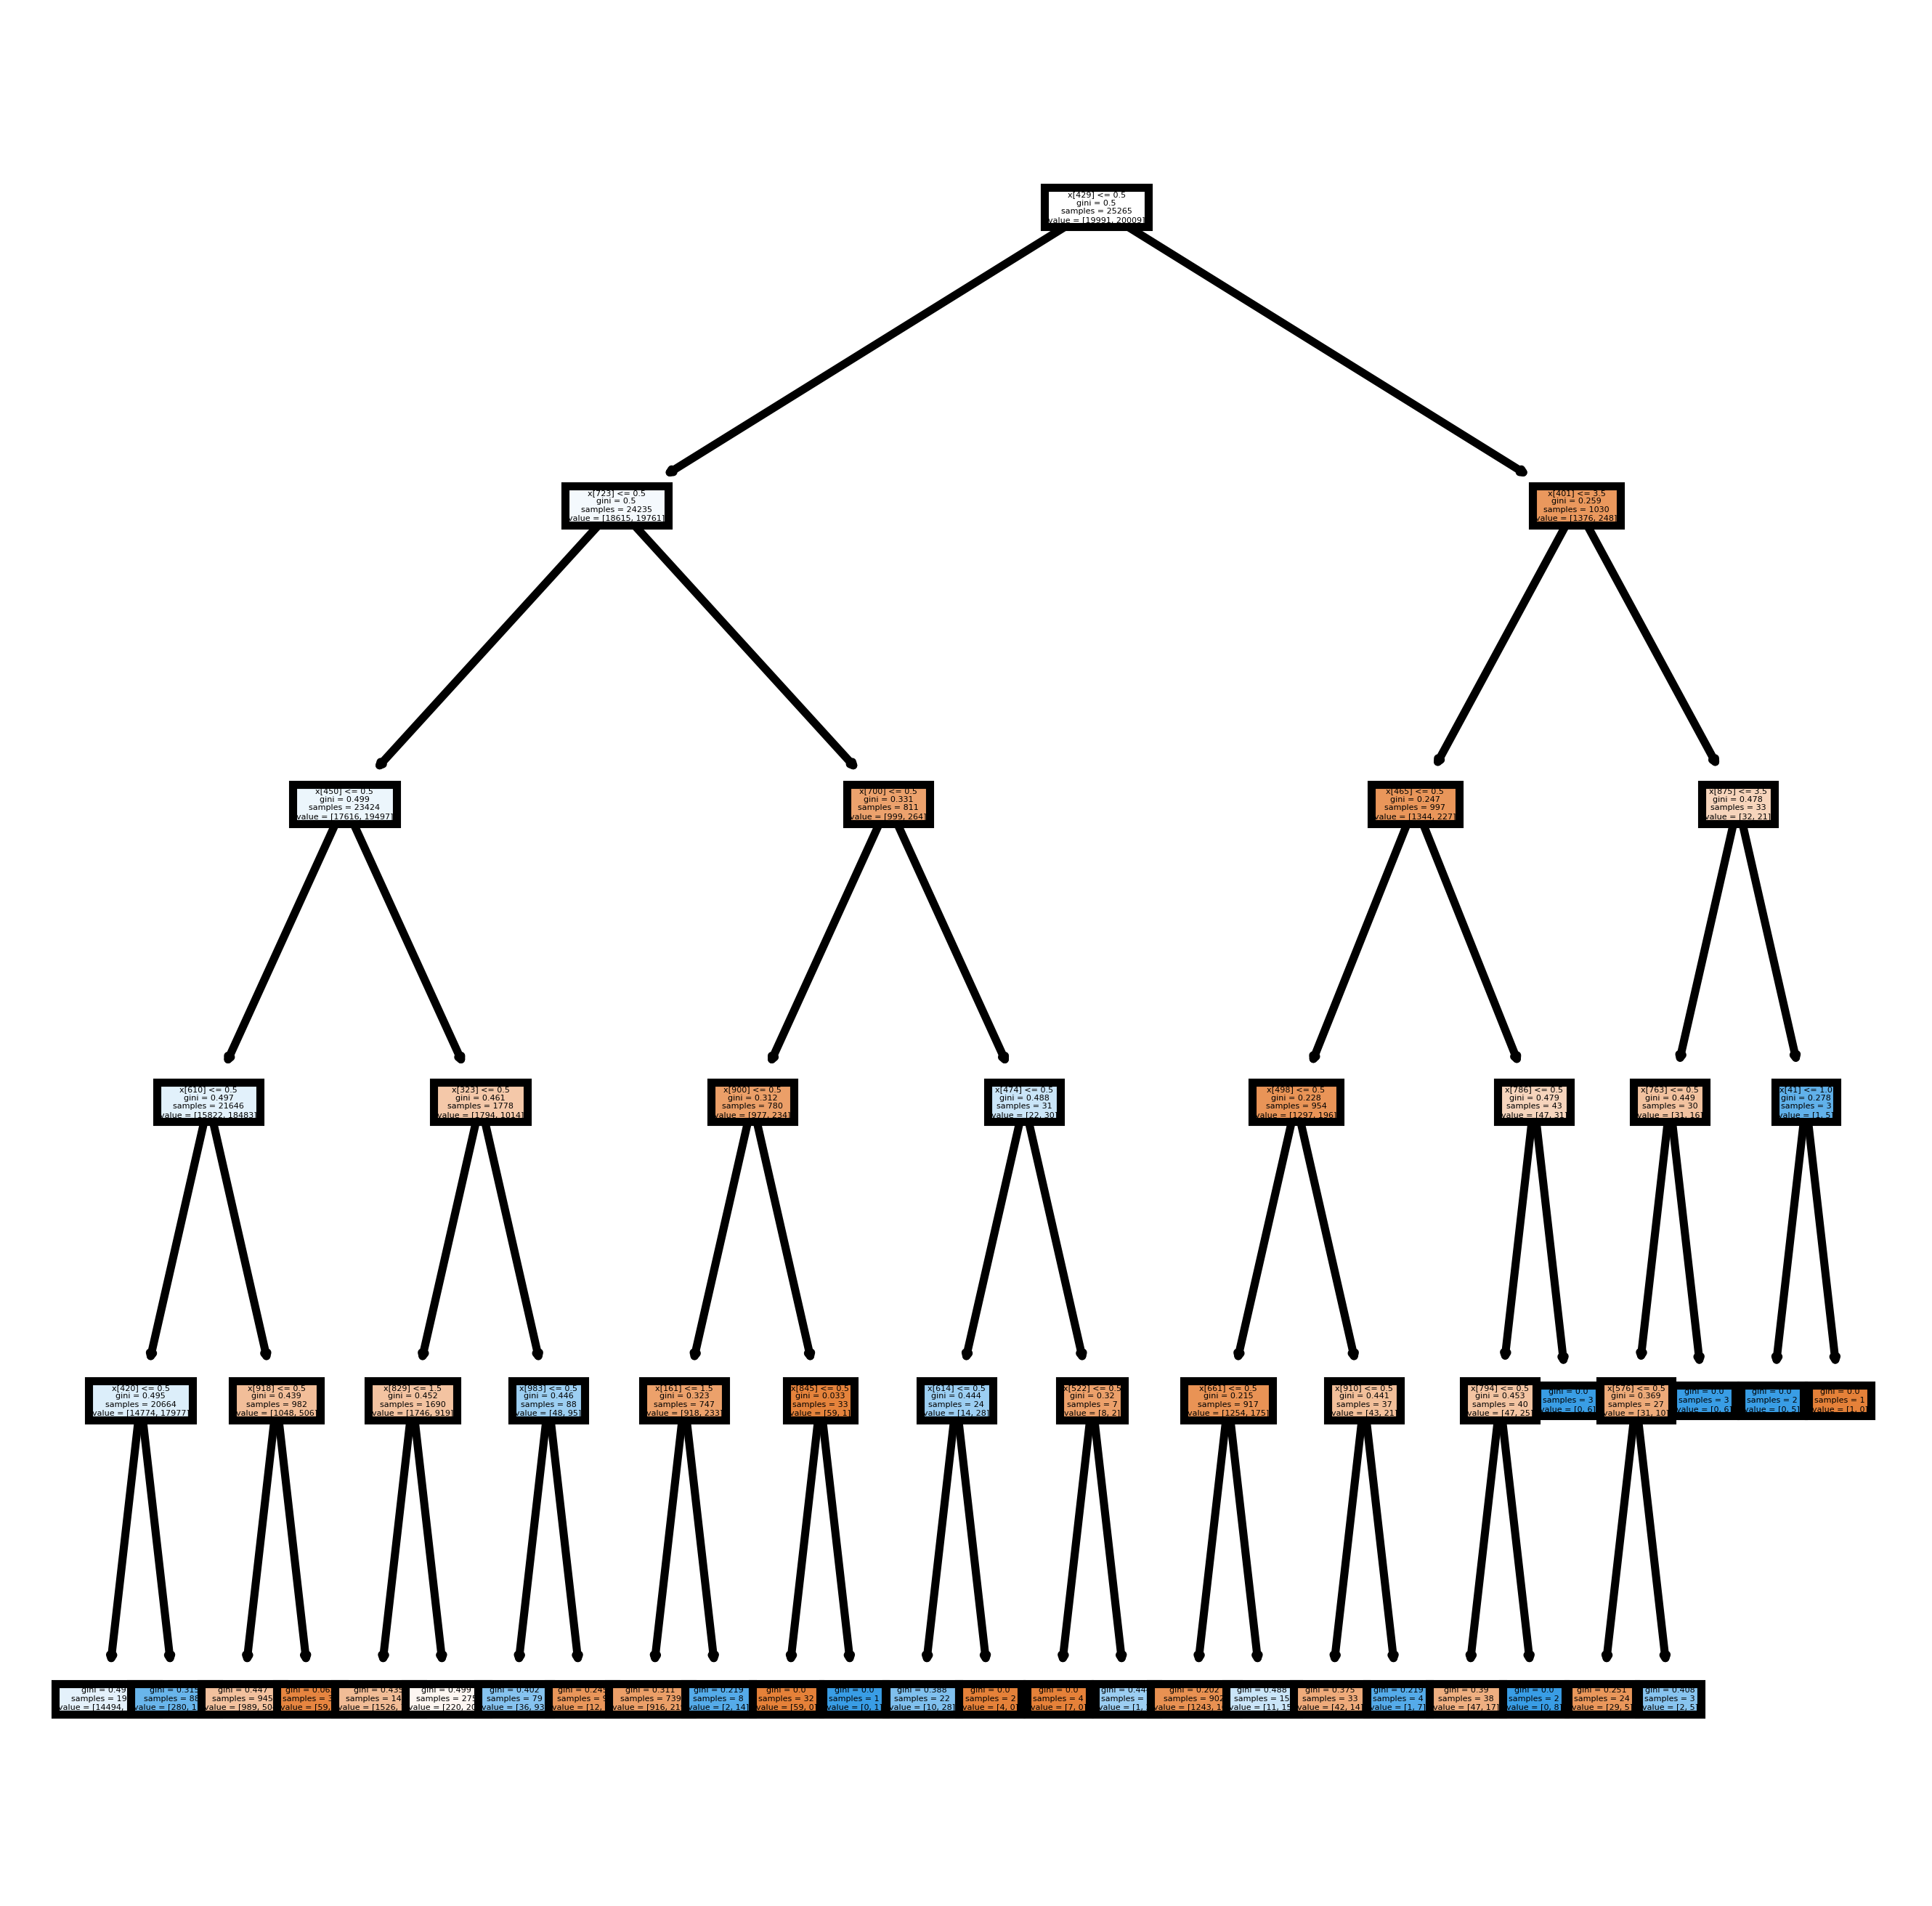

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
print(vectorizer.get_feature_names_out()[610])
print(vectorizer.get_feature_names_out()[900])
print(vectorizer.get_feature_names_out()[474])

oh
tried
kind


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[3484 1551]
 [ 918 4047]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      5035
           1       0.72      0.82      0.77      4965

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000

0.7531


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
classifier = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

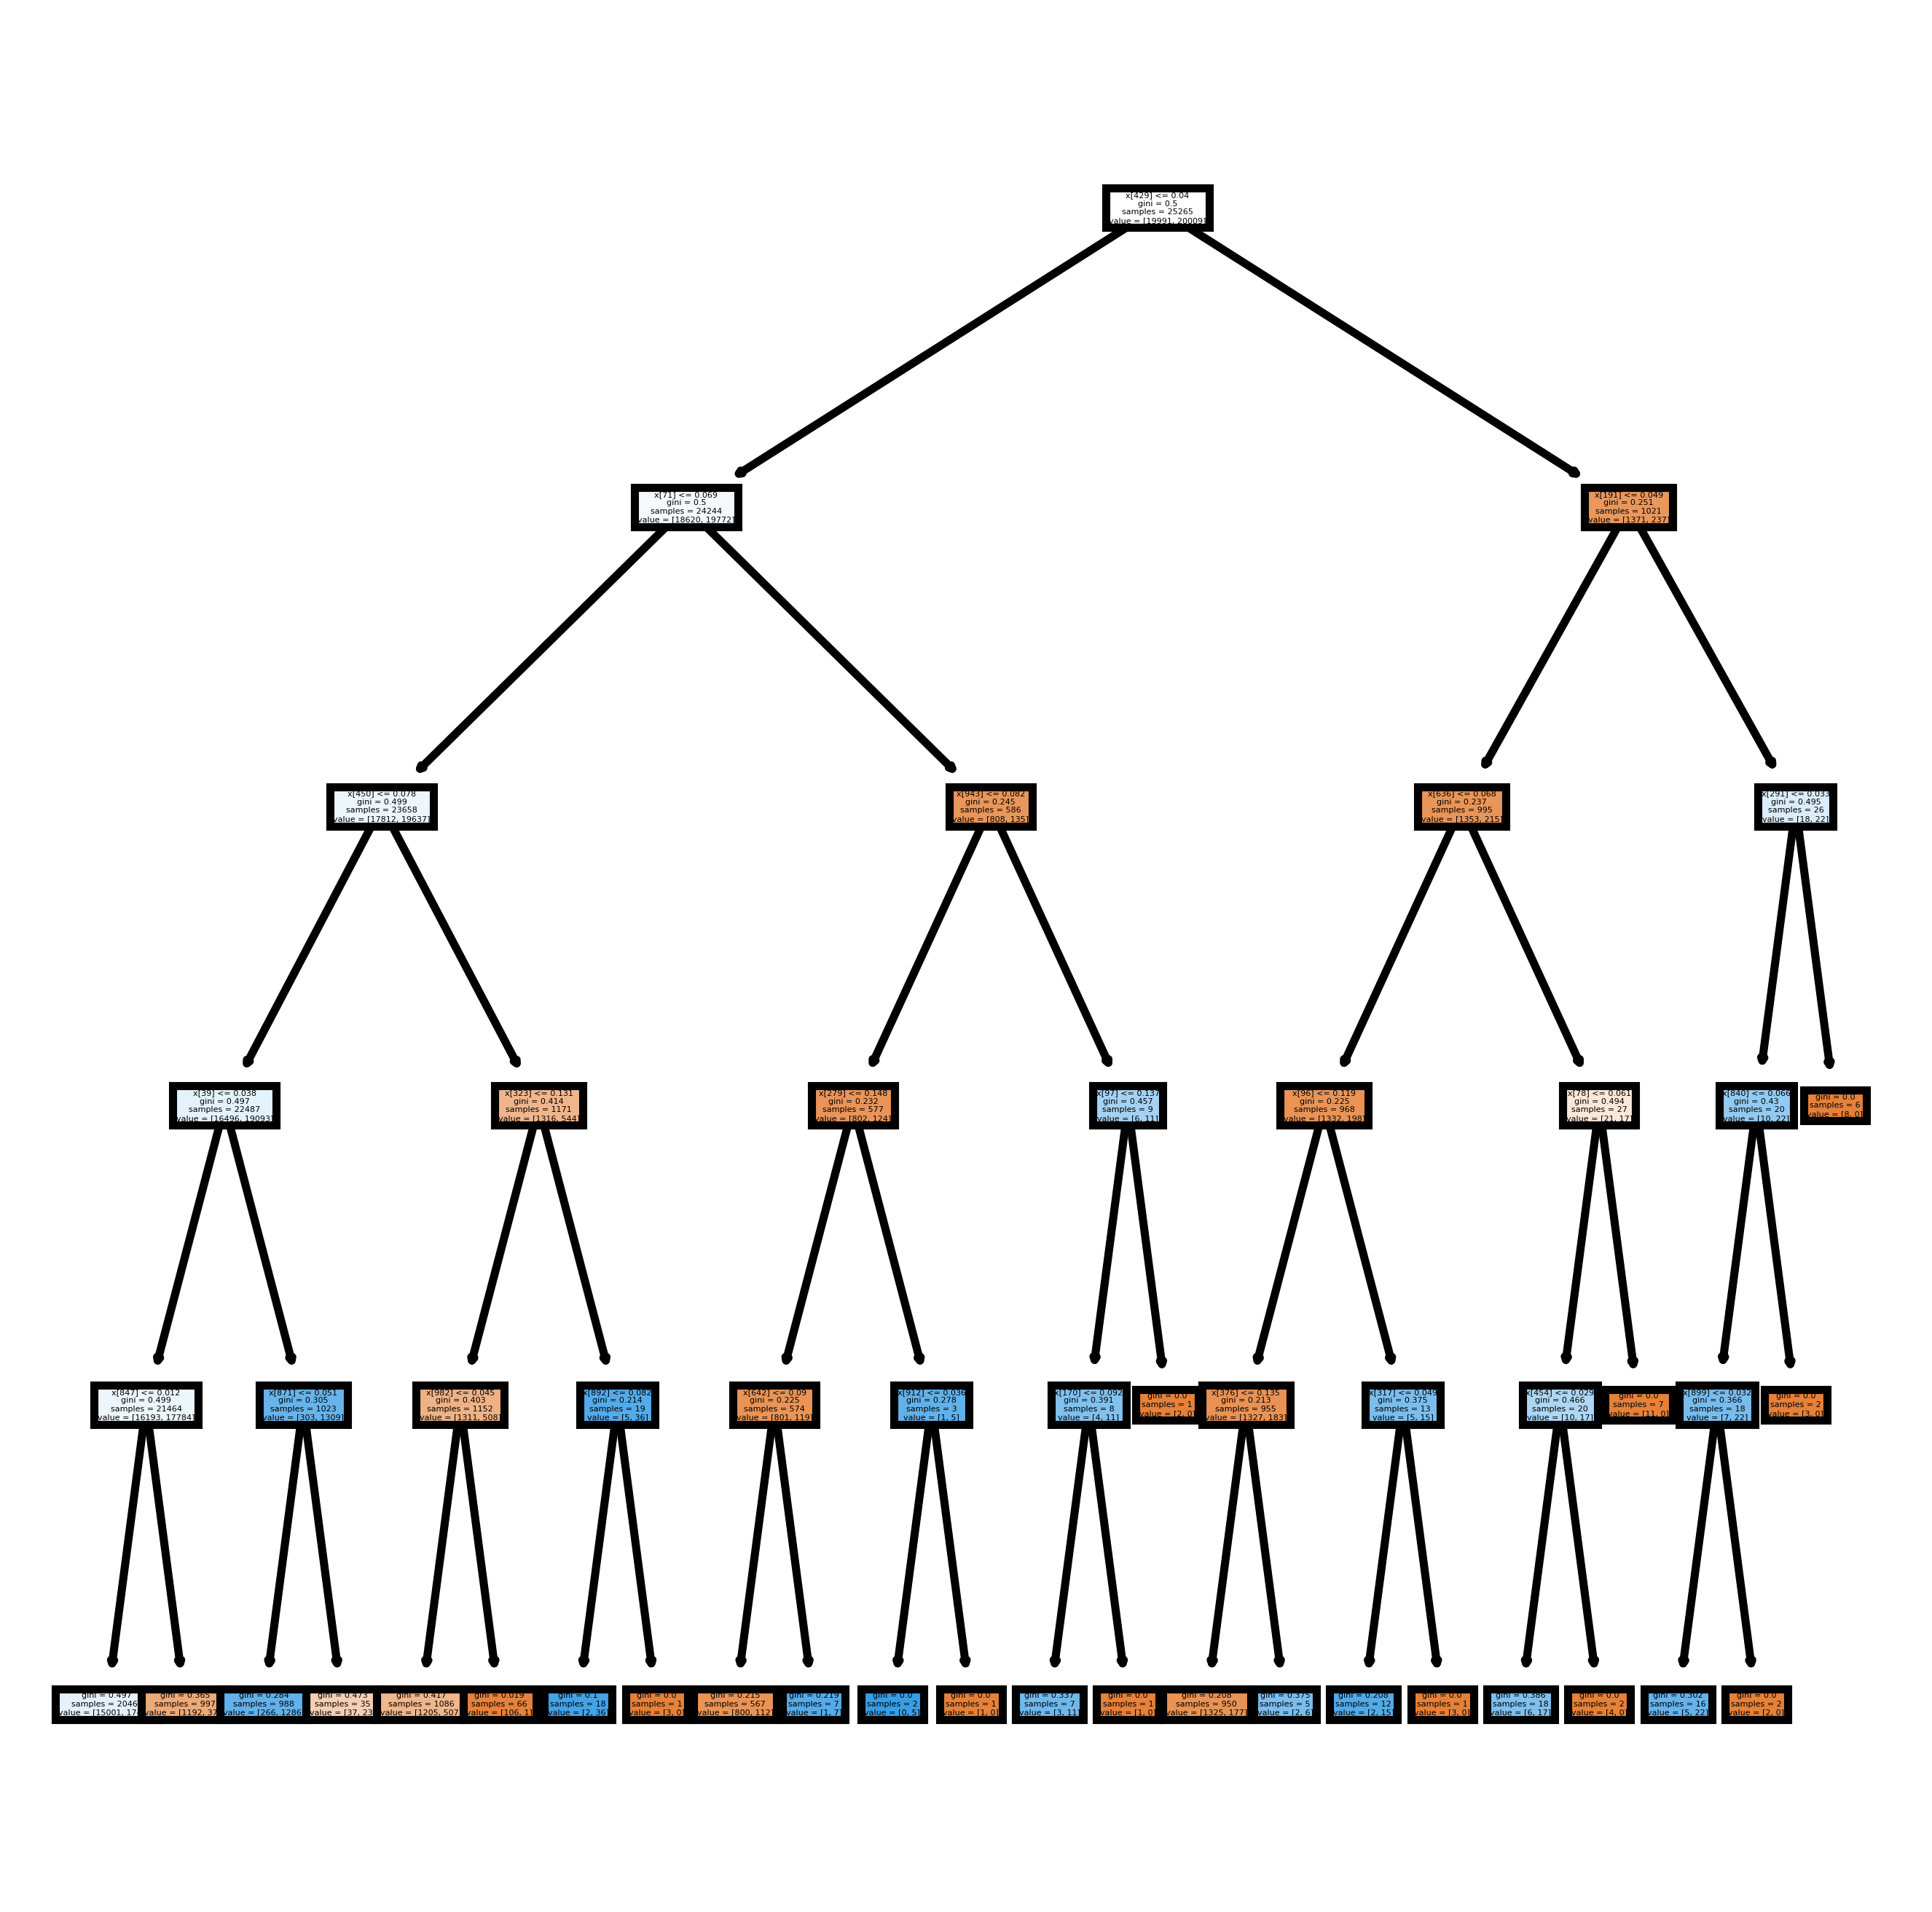

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# fn=data.feature_names
# cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               filled = True);
#
#               feature_names = fn,
#               class_names=cn,
fig.savefig('rf_individualtree.png')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[3414 1621]
 [ 892 4073]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      5035
           1       0.72      0.82      0.76      4965

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

0.7487


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[4283  752]
 [ 669 4296]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5035
           1       0.85      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

0.8579
